In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler , LabelEncoder 
from sklearn.preprocessing import LabelEncoder , OneHotEncoder ,MinMaxScaler
from sklearn.neighbors import NearestNeighbors

In [2]:
df=pd.read_csv(r'/Users/arun/Downloads/healthcare_dataset.csv')
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [3]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

In [4]:
# checking for null values
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [5]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [6]:
df.describe(include = 'object')

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500
unique,49992,2,8,6,1827,40341,39876,5,3,1856,5,3
top,DAvId muNoZ,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,Elective,2020-03-15,Lipitor,Abnormal
freq,3,27774,6969,9308,50,27,44,11249,18655,53,11140,18627


In [7]:
df.duplicated().sum()

534

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df['Date of Admission']=pd.to_datetime(df['Date of Admission'])
df['Discharge Date']=pd.to_datetime(df['Discharge Date'])
df.dtypes

Name                          object
Age                            int64
Gender                        object
Blood Type                    object
Medical Condition             object
Date of Admission     datetime64[ns]
Doctor                        object
Hospital                      object
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
dtype: object

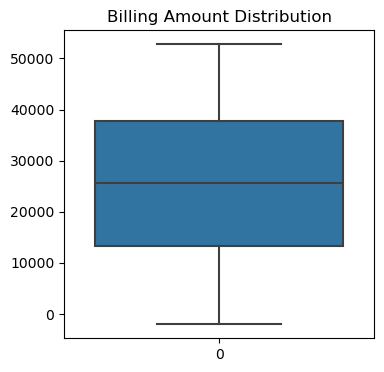

In [10]:
plt.figure(figsize=(4,4))
sns.boxplot(df['Billing Amount'])
plt.title('Billing Amount Distribution')
plt.show()

In [11]:
df['Gender'].value_counts()

Gender
Male      27496
Female    27470
Name: count, dtype: int64

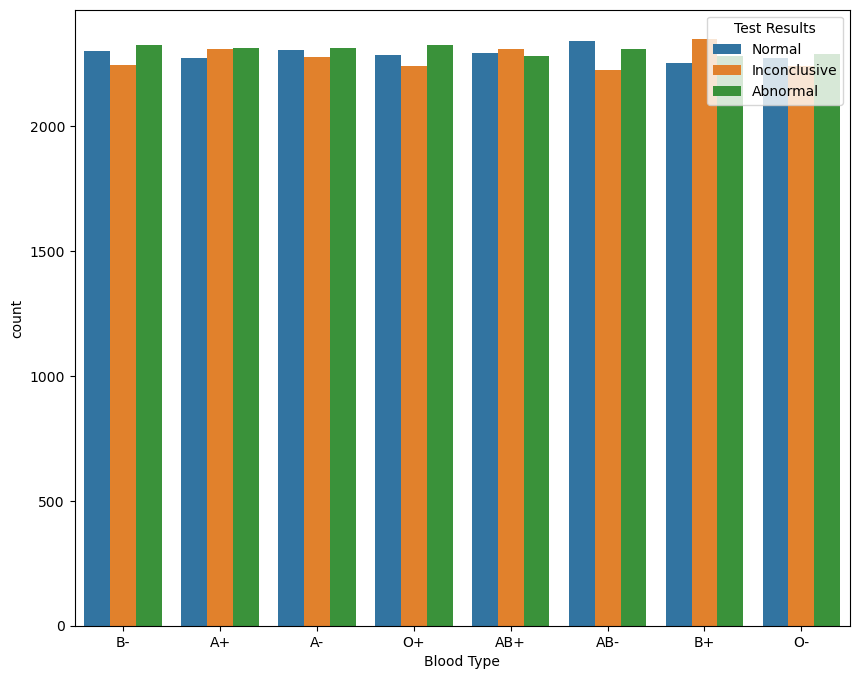

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Blood Type',hue='Test Results')
plt.show()

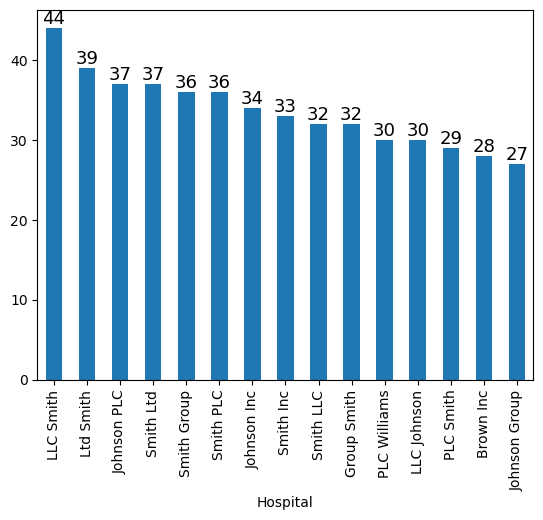

In [14]:
ax=df['Hospital'].value_counts(ascending=False).head(15).plot(kind='bar')
ax.bar_label(ax.containers[0],fontsize=13)
plt.show()

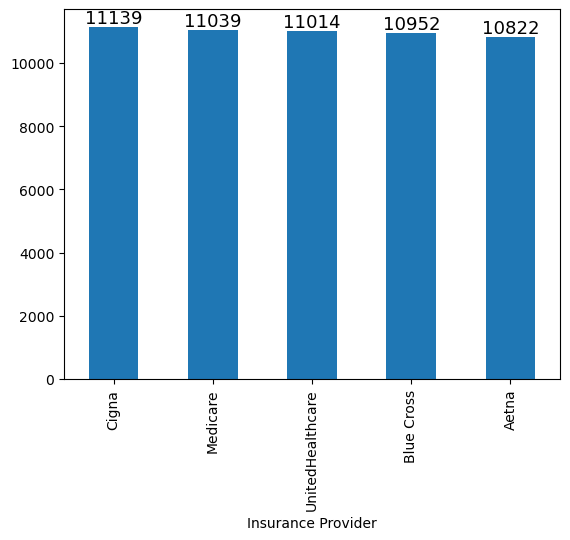

In [15]:
ax=df['Insurance Provider'].value_counts(ascending=False).plot(kind='bar')
ax.bar_label(ax.containers[0],fontsize=13)
plt.show()

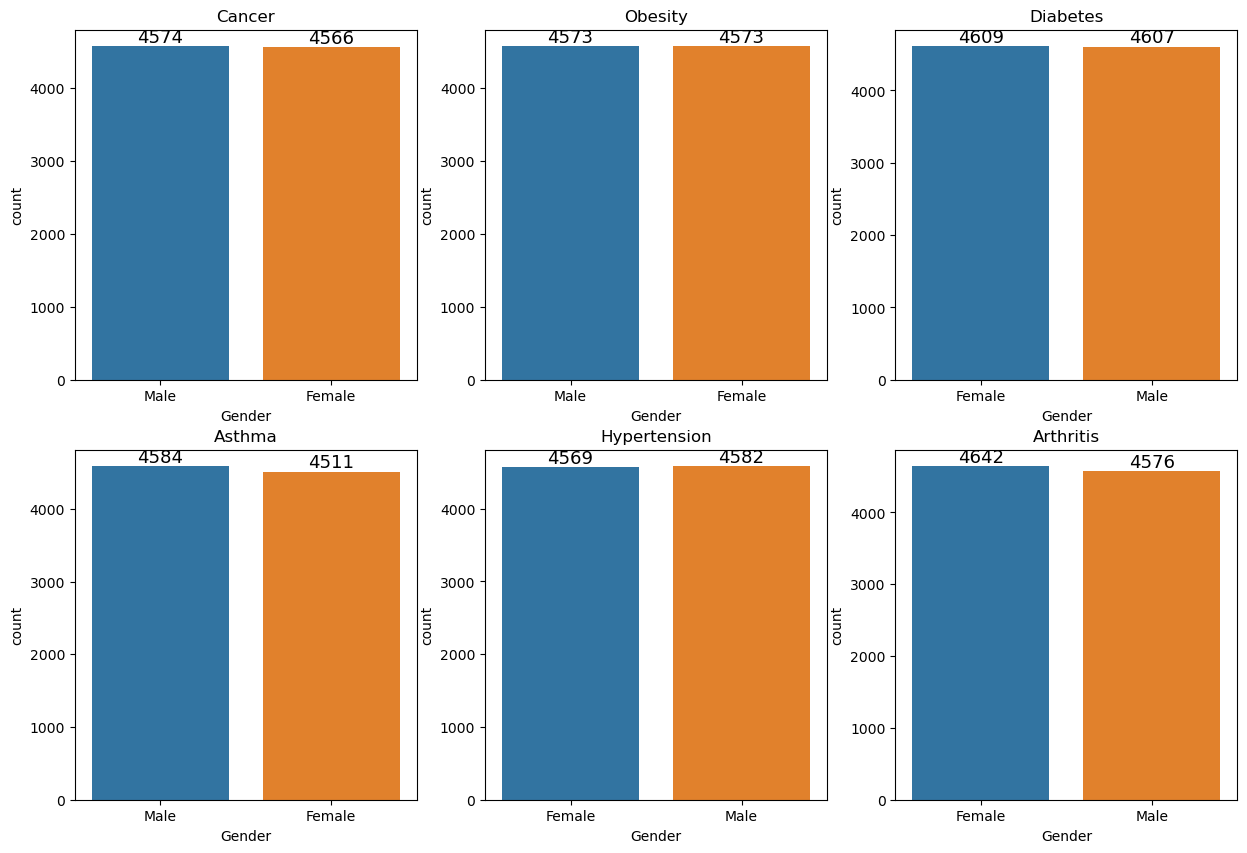

In [16]:
plt.figure(figsize=(15,10))
for index,i in enumerate(df['Medical Condition'].unique()):
    plt.subplot(2,3,index+1)
    ax=sns.countplot(data=df[df['Medical Condition']==i],x='Gender')
    ax.bar_label(ax.containers[0],fontsize=13)
    plt.title(i)
plt.show()

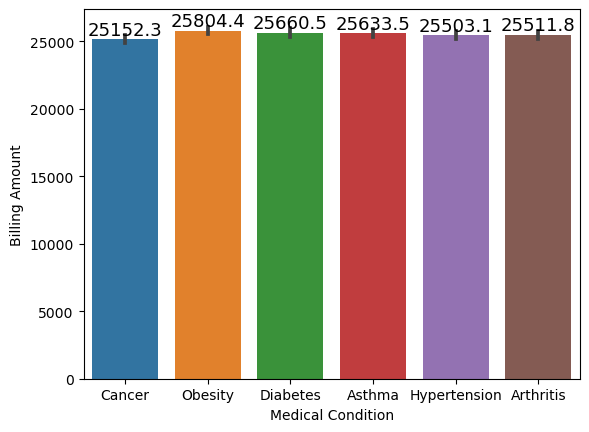

In [17]:
ax=sns.barplot(x='Medical Condition',y='Billing Amount',data=df)
ax.bar_label( ax.containers[0],fontsize=13)
plt.show()

In [18]:
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Blood Type'] = le.fit_transform(df['Blood Type'])
df['Medical Condition'] = le.fit_transform(df['Medical Condition'])
df['Admission Type'] = le.fit_transform(df['Admission Type'])
df['Medication'] = le.fit_transform(df['Medication'])
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,1,5,2,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,2,2024-02-02,3,Normal
1,LesLie TErRy,62,1,0,5,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,1,2019-08-26,1,Inconclusive
2,DaNnY sMitH,76,0,1,5,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,1,2022-10-07,0,Normal
3,andrEw waTtS,28,0,6,3,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,0,2020-12-18,1,Abnormal
4,adrIENNE bEll,43,0,2,2,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,2,2022-10-09,4,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,0,6,1,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,0,2020-09-15,4,Abnormal
55496,KYle pEREz,61,0,3,5,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,0,2020-02-01,0,Normal
55497,HEATher WaNG,38,0,4,4,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,2,2020-08-10,1,Abnormal
55498,JENniFER JOneS,43,1,7,0,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,0,2019-05-31,1,Abnormal


In [19]:
X = df[['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication']]

In [20]:
knn = NearestNeighbors(n_neighbors=3, metric='euclidean')
knn.fit(X)

NearestNeighbors(metric='euclidean', n_neighbors=3)

In [21]:
health_tips = {
    0: ['Stay active', 'Maintain a healthy weight', 'Use joint-friendly exercises'],
    1: ['Use inhaler regularly', 'Avoid triggers', 'Keep indoor air clean'],
    2: ['Avoid smoking', 'Eat a balanced diet', 'Regular screenings'],
    3: ['Monitor blood sugar', 'Exercise regularly', 'Maintain a balanced diet'],
    4: ['Reduce salt intake', 'Regular BP monitoring', 'Exercise'],
    5: ['Maintain a calorie deficit', 'Exercise regularly', 'Follow a healthy diet']
}

In [22]:
def get_knn_recommendations(user_index, n_recommendations=3):
    distances, indices = knn.kneighbors([X.iloc[user_index]], n_neighbors=n_recommendations+1)
    neighbor_conditions = df.iloc[indices.flatten()[1:]]['Medical Condition']
    recommended_tips = []
    for condition in neighbor_conditions:
        tips = health_tips.get(condition, [])
        recommended_tips.extend(tips)
    return set(recommended_tips)

In [23]:
user_index = 0
recommendations = get_knn_recommendations(user_index)
print(f"Recommended health tips for user {user_index}: {recommendations}")

Recommended health tips for user 0: {'Avoid smoking', 'Eat a balanced diet', 'Regular screenings'}


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [24]:
user_index =5
recommendations = get_knn_recommendations(user_index)
print(f"Recommended health tips for user {user_index}: {recommendations}")

Recommended health tips for user 5: {'Use inhaler regularly', 'Keep indoor air clean', 'Avoid triggers'}


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
